* Write `sympy` code to calculate the Fourier transform of the function $f(x) = e^{-x^2} \sin x$.
* Write `numpy` code to calculate the norm of a random 3x3 matrix.

In [ ]:
import sympy as sp
import numpy as np
from IPython.display import display

x = sp.symbols("x")
k = sp.symbols("k")

f = sp.exp(-(x**2)) * sp.sin(x)

print("The Fourier transform of f(x) = exp(-x^2) * sin(x) is:")
display(sp.fourier_transform(f, x, k, noconds=True))


rand_matrix = np.random.rand(3, 3)
print(f"The norm of the random matrix are: {np.linalg.norm(rand_matrix):.2f}")

The Gamma function of 1/2 is: 1.77
The Fourier transform of f(x) = exp(-x^2) * sin(x) is:
The eigenvalues of the above random matrix are:
[ 2.1129579 +0.j         -0.19008863+0.40304941j -0.19008863-0.40304941j
  0.23528946+0.06782901j  0.23528946-0.06782901j]
The norm of the above random matrix are: 1.51


Let $a_1 = 1$, $a_2=2$, and $a_n = \sqrt{a_{n-1}a_{n-2}}$. Calculate the coefficient of 50th element of the sequence and show the result in the floating point form with 3 decimal places.

In [21]:
import sympy as sp
from sympy.series.sequences import RecursiveSeq

a = sp.Function("a")
n = sp.Symbol("n", integer=True)

seq = RecursiveSeq(sp.sqrt(a(n - 1) * a(n - 2)), a(n), n, initial=[1, 2])
seq.coeff(50)
print(f"The 50th element of the sequence is {seq.coeff(50).evalf():.3f}")

The 50th element of the sequence is 1.587


Find the general solution to the following systems of equations.
$$
\begin{align*}
y_1' &= 3y_1\\
y_2' &= y_1 + y_2\\
y_3' &= y_1 + y_3
\end{align*}
$$
with initial conditions $y_1(0)=2$, $y_2(0)=2$, $y_3(0)=1$.


In [ ]:
import sympy as sp
from IPython.display import display

x = sp.symbols("x")
y1, y2, y3 = sp.symbols("y_1:4", cls=sp.Function)

eqs = [
    sp.Eq(y1(x).diff(x), 3 * y1(x)),
    sp.Eq(y2(x).diff(x), y1(x) + y2(x)),
    sp.Eq(y3(x).diff(x), y1(x) + y3(x)),
]

dep_vars = [y1(x), y2(x), y3(x)]
solutions = sp.dsolve(eqs, dep_vars, ics={y1(0): 2, y2(0): 2, y3(0): 1})

for solution in solutions:
    display(solution)


Eq(y_1(x), 2*exp(3*x))

Eq(y_2(x), exp(3*x) + exp(x))

Eq(y_3(x), exp(3*x))

Use `numpy` and `matplotlib` libraries to sketch the spiral curve given by $x=t\cos(t)$, $y=t\sin(t)$ from $−2\pi\le t\le 2\pi$.

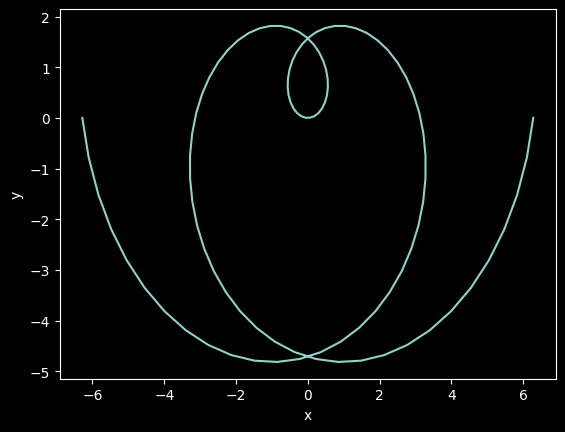

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def spiral(t):
    x = t * np.cos(t)
    y = t * np.sin(t)
    return x, y


number_of_points = 100
t = np.linspace(-2 * np.pi, 2 * np.pi, number_of_points)

fig = plt.figure()
# the following line is more openly can be written as:
# plt.plot(spiral(t)[0], spiral(t)[1], label="Spiral Curve")
plt.plot(*spiral(t), label="Spiral Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close(fig)



Solve $x'' − x = (t^2−1)$ for initial conditions $x(0)=1$, $x'(0)=2$ using the Laplace transform.


In [ ]:
import sympy as sp
import numpy as np

t = sp.symbols("t")
s = sp.symbols("s")
x = sp.Function("x")
X = sp.Function("X")


# define the differential equation
lhs = x(t).diff(t, 2) - x(t)
rhs = t**2 - 1

laplace_lhs = sp.laplace_transform(lhs, t, s, noconds=True)

# substitute initial conditions
laplace_lhs = laplace_lhs.subs(
    {
        sp.laplace_transform(x(t), t, s, noconds=True): X(s),
        sp.laplace_transform(x(t).diff(t), t, s, noconds=True): s * X(s) - x(0),
    }
)

laplace_lhs = laplace_lhs.subs({x(0): 1, x(t).diff(t).subs(t, 0): 2})

laplace_rhs = sp.laplace_transform(rhs, t, s, noconds=True)

laplace_solution = sp.solve(laplace_lhs - laplace_rhs, X(s))

solution = sp.inverse_laplace_transform(laplace_solution[0], s, t).simplify()
solution

(-t**2 + 2*exp(t) - 1)*Heaviside(t)